In [2]:
import requests

params = {
  'access_key': '9157b4a71cda79091103bc987999f47e',
  'flight_date': '2022-02-21',
  'offset': 100
}

api_result = requests.get('https://api.aviationstack.com/v1/flights', params)


In [3]:

import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit

In [4]:
import pandas as pd
df = pd.read_csv('airflight_data/winter_2021_clean.csv')
df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'airflight_data/winter_2021_clean.csv'

In [123]:
df['departure_actual'] = pd.to_datetime(df['departure_actual'], format = '%d/%m/%Y %H:%M:%S')
df['days_of_week'] = df['departure_actual'].dt.day_name()
Delay_vs_Day_of_Week = pd.DataFrame({'delays' : df.groupby(['days_of_week'])['departure_delay'].mean()}).reset_index()
Delay_vs_Day_of_Week

df['time_slot'] = (df['departure_actual'].dt.hour//4)
Delay_vs_actual_DEPARTURE = pd.DataFrame({'delays' : df.groupby(['time_slot'])['departure_delay'].mean()}).reset_index()
Delay_vs_actual_DEPARTURE

,time_slot,delays
0,0.0,35.466408
1,1.0,17.388511
2,2.0,20.596702
3,3.0,22.307333
4,4.0,24.267200
5,5.0,29.346863


In [134]:
res = df['airline_name'].value_counts()
selected_airlines  = list(res[res>1000].index)
filter_df = df[df['airline_name'].isin(selected_airlines)]
Delay_vs_AIRLINE = pd.DataFrame({'delays' : filter_df.groupby(['airline_name'])['departure_delay'].mean()})
Delay_vs_AIRLINE 

,delays
airline_name,
ANA,19.478774
Aeromexico,24.945395
Air Canada,33.151137
Air China LTD,24.643057
Air France,25.068613
Air New Zealand,22.005213
Alaska Airlines,26.690476
American Airlines,30.366944
British Airways,28.942097


In [128]:
res = df['departure_iata'].value_counts()
selected_airlines  = list(res[res>800].index)
filter_df = df[df['departure_iata'].isin(selected_airlines)]
Delay_vs_AIRPORT = pd.DataFrame({'delays' : filter_df.groupby(['departure_iata'])['departure_delay'].mean()}).reset_index()
Delay_vs_AIRPORT

,departure_iata,delays
0,AMS,22.938664
1,ATL,23.296973
2,CAN,19.856296
3,CDG,26.038283
4,DFW,27.436429
5,HND,16.885932
6,JFK,48.407466
7,LAX,29.455108
8,ORD,35.088977
9,SZX,18.465455


[Text(0, 0, '00:00 - 04:00'),
 Text(1, 0, '04:00 - 8:00'),
 Text(2, 0, '8:00 - 12:00'),
 Text(3, 0, '12:00 - 16:00'),
 Text(4, 0, '16:00 - 20:00'),
 Text(5, 0, '20:00 - 24:00')]

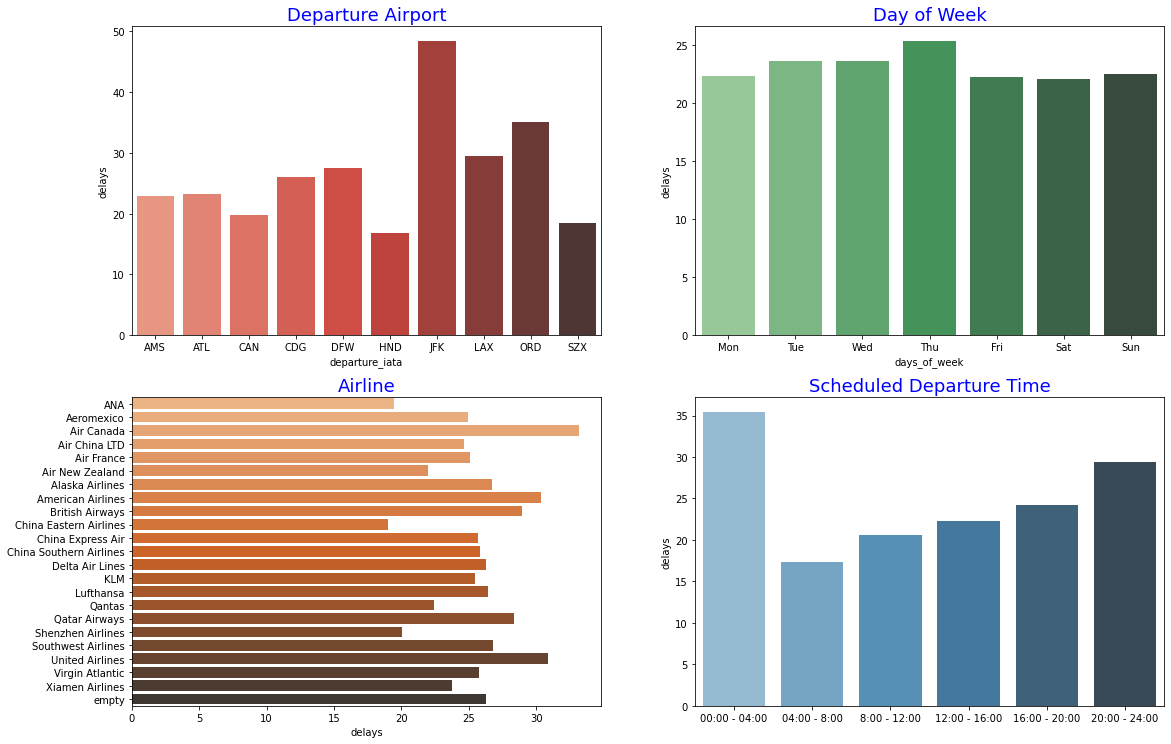

In [142]:
fig = plt.figure(figsize=(18.5, 12.5))

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('Departure Airport', fontsize=18, color="blue")
sns.barplot(x="departure_iata", y="delays", data=Delay_vs_AIRPORT, palette="Reds_d", ax = sub1)
# sub1.set_xticks(list(range(0,10,10)))
# sub1.set_xticklabels(list(range(0,52,10)))

sub2 = fig.add_subplot(222)
sub2.set_title('Day of Week', fontsize=18, color="blue")
sns.barplot(x="days_of_week", y="delays", data=Delay_vs_Day_of_Week, palette="Greens_d", ax = sub2)
sub2.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

sub3 = fig.add_subplot(223)
sub3.set_title('Airline', fontsize=18, color="blue")
sns.barplot(y = list(range(len(Delay_vs_AIRLINE))), x=Delay_vs_AIRLINE['delays'], palette="Oranges_d", ax = sub3, orient="h")
sub3.set_yticks(range(len(Delay_vs_AIRLINE)))
sub3.set_yticklabels(Delay_vs_AIRLINE.index)

sub4 = fig.add_subplot(224)
sns.barplot(x = list(range(len(Delay_vs_actual_DEPARTURE))), y=Delay_vs_actual_DEPARTURE['delays'], palette="Blues_d", ax = sub4)
sub4.set_title('Scheduled Departure Time', fontsize=18, color="blue")
sub4.set_xticks([0, 1, 2, 3, 4, 5])
sub4.set_xticklabels(['00:00 - 04:00','04:00 - 8:00','8:00 - 12:00','12:00 - 16:00', '16:00 - 20:00', '20:00 - 24:00'])